# Практична робота № 6
# Тема. Графи. Найкоротші шляхи
# Мета: набути практичних навичок розв’язання задач пошуку найкоротших шляхів у графі та оцінювання їх асимптотичної складності.


# Задача з вар. 1, але за алгоритмом Белмена–Форда.

Найкоротші відстані від вершини 1:
Вершина 1: 0
Вершина 2: 7
Вершина 3: 9
Вершина 4: 20
Вершина 5: 20
Вершина 6: 11


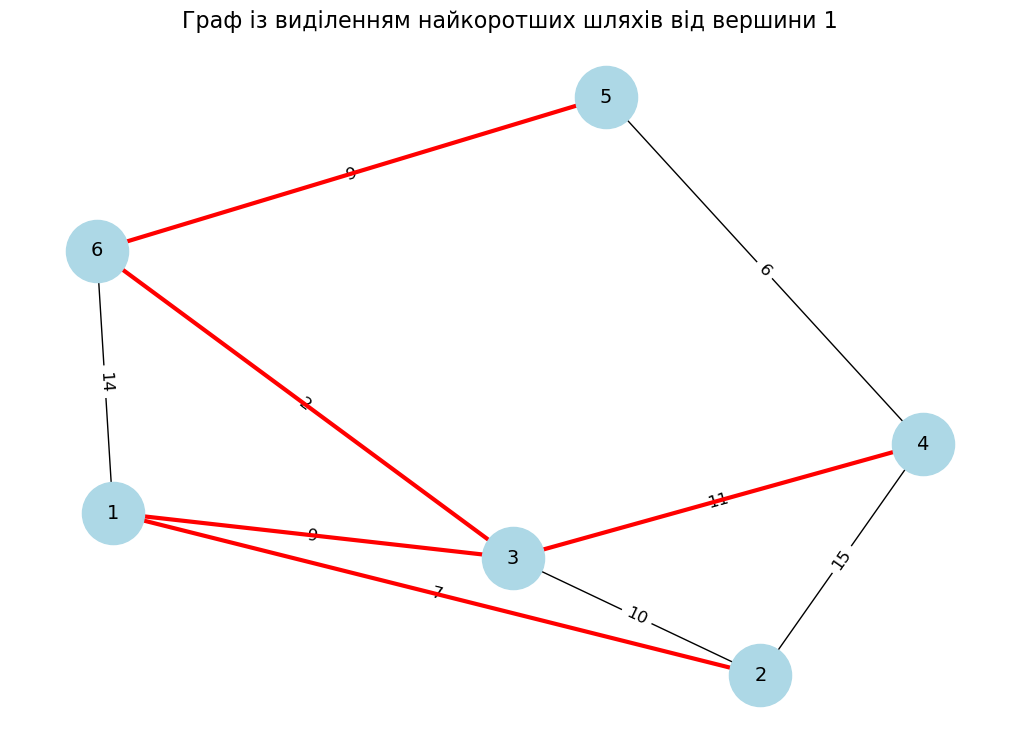

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Вхідні дані
edges = [
    (1, 2, 7),
    (1, 3, 9),
    (1, 6, 14),
    (2, 3, 10),
    (2, 4, 15),
    (3, 4, 11),
    (3, 6, 2),
    (4, 5, 6),
    (5, 6, 9)
]

# Створення графа
G = nx.Graph()
G.add_weighted_edges_from(edges)

# Беллман-Форд
V = 6
dist = {v: float('inf') for v in range(1, V + 1)}
prev = {v: None for v in range(1, V + 1)}
dist[1] = 0

# Основний цикл
for _ in range(V - 1):
    for u, v, w in edges:
        if dist[u] + w < dist[v]:
            dist[v] = dist[u] + w
            prev[v] = u
        if dist[v] + w < dist[u]:
            dist[u] = dist[v] + w
            prev[u] = v

# Виведення відстаней
print("Найкоротші відстані від вершини 1:")
for v in range(1, V + 1):
    print(f"Вершина {v}: {dist[v]}")

# Побудова найкоротших шляхів від вершини 1
shortest_paths = []
for v in range(2, V + 1):
    path = []
    cur = v
    while cur is not None and cur != 1:
        path.append((prev[cur], cur))
        cur = prev[cur]
    shortest_paths.extend(path)

# Унікальні ребра шляху
shortest_paths = list(set(shortest_paths))

# Позиції вузлів для візуалізації
pos = nx.spring_layout(G, seed=42)

# Візуалізація
plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=14)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w for u, v, w in edges}, font_size=12)

# Виділення найкоротших шляхів червоним
nx.draw_networkx_edges(G, pos, edgelist=shortest_paths, edge_color='red', width=3)

plt.title("Граф із виділенням найкоротших шляхів від вершини 1", fontsize=16)
plt.show()


# Контрольні питання


# 1. Що таке граф і які головні складові його структури?
Граф — це математична структура, що моделює зв'язки (ребра) між об'єктами (вузлами або вершинами).
Головні складові:
Вершини (nodes або vertices) — об'єкти (наприклад, міста, комп’ютери).
Ребра (edges) — зв'язки між вершинами.
Вага (вага ребра) — числове значення, що може вказувати відстань, вартість, час тощо.
Типи графів:
Орієнтовані або неорієнтовані
Зважені або незважені
Циклічні або ациклічні
# 2. Які алгоритми використовуються для пошуку найкоротших шляхів у графах?
Основні алгоритми:
Алгоритм	Призначення
Дейкстри	Найкоротший шлях від однієї вершини, тільки з невід’ємними вагами
Беллмана–Форда	Працює з від’ємними вагами, від однієї вершини
Флойда–Форшала	Найкоротші шляхи між усіма парами вершин
A*	Евристичний пошук шляху
Алгоритм Джонсона	Ефективний для багатьох запитів між вершинами
BFS (в незважених графах)	Найкоротший шлях, якщо всі ваги однакові або граф незважений
# 3. Як працює алгоритм Дейкстри і які його особливості?
Алгоритм Дейкстри шукає найкоротші шляхи від однієї вершини до всіх інших у зваженому графі без від’ємних ваг.
Основні крок:
Ініціалізуються всі відстані як нескінченність, крім початкової вершини (0).
Вибирається вершина з найменшою поточною відстанню.
Оновлюються відстані до її сусідів.
Повторюється, поки всі вершини не оброблено.
Особливості:
Вимагає невід’ємних ваг.
Найкраща реалізація використовує пріоритетну чергу (наприклад, через heapq).
Швидкий для розріджених графів.
# 4. Що таке алгоритм Белмена–Форда і коли його варто застосовувати?
Алгоритм Беллмана–Форда знаходить найкоротші шляхи від однієї вершини до всіх інших, і працює з від’ємними вагами.
Як працює:
Ініціалізує всі відстані.
Повторює (V-1) разів: для кожного ребра (u, v) перевіряє, чи можна покращити dist[v].
Остання ітерація перевіряє наявність негативного циклу.
Особливості:
Підходить, коли є від’ємні ваги.
Повільніший за Дейкстру: O(V·E).
Визначає наявність негативних циклів.
# 5. Як працює алгоритм Флойда–Форшала і які його переваги та недоліки?
Алгоритм Флойда–Форшала знаходить найкоротші шляхи між усіма парами вершин.
Як працює:
Створюється матриця відстаней між усіма вершинами.
Для кожної вершини k, оновлюються dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j]).
Переваги:
Простий і універсальний.
Працює з від’ємними вагами (якщо немає негативних циклів).
Дає всі пари шляхів одразу.
Недоліки:
Повільний для великих графів: O(V³).
Не підходить для графів з дуже великою кількістю вершин